# Prediction Using Supervised ML

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
dataset_url = 'http://bit.ly/w-data'
df = pd.read_csv(dataset_url)


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2.Data summary


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

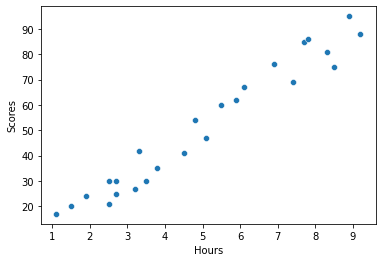

In [7]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])

## 3.Locating Dependent and Indepedent variable


In [8]:
X = df['Hours'].values
y = df['Scores'].values

X[:5]

array([2.5, 5.1, 3.2, 8.5, 3.5])

In [9]:
y[:5]

array([21, 47, 27, 75, 30])

## 3. Splitting the data into train and test set

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_test  :", X_test.shape, " y_test  :", y_test.shape)


X_train : (18,) y_train : (18,)
X_test  : (7,)  y_test  : (7,)


In [11]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

#Fitting the Linear Regression Model

In [12]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_predict = lr.predict(X_test)

In [14]:
y_predict

array([11.83450607, 26.23850122, 20.06536044, 95.17190655, 71.50820024,
       28.29621481, 87.96990898])

In [15]:
df = pd.DataFrame({"Actual":y_test, "Predicted":y_predict})
df.head()

,Actual,Predicted
0,17,11.834506
1,21,26.238501
2,24,20.065360
3,88,95.171907
4,76,71.508200


In [16]:
print("Training score: ",lr.score(X_train,y_train))
print("Testing score: ",lr.score(X_test,y_test))

Training score:  0.9510642620413721
Testing score:  0.9456536786570634


Coefficient:  [10.28856796] 
Intercept  :  0.5170813182095699


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


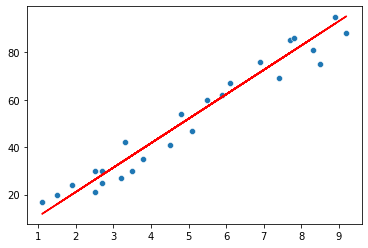

In [17]:

print("Coefficient: ", lr.coef_, "\nIntercept  : ", lr.intercept_)

line = lr.coef_ * X + lr.intercept_

sns.scatterplot(X, y)
plt.plot(X, line, color='red')
plt.show()

Accuracy

In [18]:
hours = 9.25
X = np.array([hours])
X = X.reshape(-1,1)
prediction = lr.predict(X)

print("Total Hours\t : {}".format(hours))
print("Score should be\t : {}".format(round(prediction[0],3)))

Total Hours	 : 9.25
Score should be	 : 95.686
